In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [3]:
def freq_mask(spec, F=20, num_masks=2, replace_with_zero=True):
    cloned = spec.clone()
    num_mel_channels = cloned.shape[1]
    
    for i in range(0, num_masks):        
        f = random.randrange(0, F)
        f_zero = random.randrange(0, num_mel_channels - f)

        # avoids randrange error if values are equal and range is empty
        if (f_zero == f_zero + f): return cloned

        mask_end = random.randrange(f_zero, f_zero + f) 
        if (replace_with_zero): cloned[0][f_zero:mask_end] = 0
        else: cloned[0][f_zero:mask_end] = cloned.mean()
    
    return cloned

def time_mask(spec, T=20, num_masks=1, replace_with_zero=False):
    cloned = spec.clone()
    len_spectro = cloned.shape[2]
    
    for i in range(0, num_masks):
        t = random.randrange(0, T)
        t_zero = random.randrange(0, len_spectro - t)

        # avoids randrange error if values are equal and range is empty
        if (t_zero == t_zero + t): return cloned

        mask_end = random.randrange(t_zero, t_zero + t)
        if (replace_with_zero): cloned[0][:,t_zero:mask_end] = 0
        else: cloned[0][:,t_zero:mask_end] = cloned.mean()
    return cloned



In [6]:
img = np.random.rand(1, 256, 256)

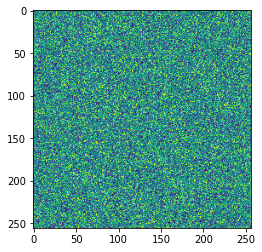

In [7]:
plt.imshow(img[0])

In [ ]:
tfms = Compose(
    [TimeMask(max_band_part=0.1, p=1), TimeMask(max_band_part=0.1, p=1)]
)

In [ ]:
plt.imshow(tfms(img, 330000))

In [ ]:
plt.imshow(freq_mask(torch.tensor(img).view(1, 256, 256))[0])